In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Data Preparation

In [7]:
#Read crypto_data.csv into Pandas. The dataset was obtained from CryptoCompare.
dataset = pd.read_csv('crypto_data.csv')
dataset

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [9]:
#Discard all cryptocurrencies that are not being traded.In other words, filter for currencies that are currently being traded.
dataset = dataset.loc[dataset['IsTrading'] == True]
dataset

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [12]:
#Once you have done this, drop the IsTrading column from the dataframe.
dataset_drop = dataset.drop(columns=['Unnamed: 0','IsTrading'])
dataset_drop

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365Coin,X11,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,PoW,NaN,611000
4,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
1243,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,SHA-256,DPoI,NaN,1000000000
1245,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,PoW,7.296538e+06,21000000


In [18]:
# Find null values
for column in dataset_drop.columns:
    print(f"Column {column} has {dataset_drop[column].isnull().sum()} null values")

Column CoinName has 0 null values
Column Algorithm has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 0 null values
Column TotalCoinSupply has 0 null values


In [19]:
#Remove all rows that have at least one null value.
dataset_drop.dropna(inplace=True)
dataset_drop

<ipython-input-19-bda84c041918>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_drop.dropna(inplace=True)


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,PoW,7.296538e+06,21000000


In [15]:
#Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero.
dataset_drop = dataset_drop.loc[dataset_drop['TotalCoinsMined'] != 0]
dataset_drop

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,PoW,7.296538e+06,21000000


In [17]:
#In order for your dataset to be comprehensible to a machine learning algorithm, its data should be numeric. Since the coin names do not contribute to the analysis of the data, delete the CoinName from the original dataframe.
dataset_drop_name = dataset_drop.drop(columns=['CoinName'])
dataset_drop_name

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [21]:
# Method 1: If use Pandas to create dummy variables, each variable from the columns of Algorithm and ProofType will be separated to individual columns. All text values will become numerical data. 
trainDfDummies = pd.get_dummies(dataset_drop_name, columns=['Algorithm', 'ProofType'])
trainDfDummies

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
trainDfDummies = StandardScaler().fit_transform(trainDfDummies)
trainDfDummies

array([[-0.11674788, -0.15286468, -0.0433555 , ..., -0.0433555 ,
        -0.0433555 , -0.0433555 ],
       [-0.09358885, -0.14499604, -0.0433555 , ..., -0.0433555 ,
        -0.0433555 , -0.0433555 ],
       [ 0.52587231,  4.4937636 , -0.0433555 , ..., -0.0433555 ,
        -0.0433555 , -0.0433555 ],
       ...,
       [-0.09523411, -0.13215444, -0.0433555 , ..., -0.0433555 ,
        -0.0433555 , -0.0433555 ],
       [-0.11658774, -0.15255408, -0.0433555 , ..., -0.0433555 ,
        -0.0433555 , -0.0433555 ],
       [-0.11674507, -0.15284989, -0.0433555 , ..., -0.0433555 ,
        -0.0433555 , -0.0433555 ]])

In [25]:
# Method 2: Encoding the Dependent Variable to convert the remaining features with text values, Algorithm and ProofType, into numerical data.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset_drop_name['Algorithm'] = le.fit_transform(dataset_drop_name['Algorithm'])
dataset_drop_name['ProofType'] = le.fit_transform(dataset_drop_name['ProofType'])
dataset_drop_name

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,53,16,4.199995e+01,42
2,53,16,1.055185e+09,532000000
5,67,16,2.927942e+10,314159265359
7,47,13,1.792718e+07,21000000
8,20,13,1.076842e+08,0
...,...,...,...,...
1238,47,2,2.000000e+09,2000000000
1242,53,16,1.493105e+07,250000000
1245,10,13,9.802226e+08,1400222610
1246,18,13,7.296538e+06,21000000


In [29]:
# Feature Scaling:Standardize your dataset so that columns that contain larger values do not unduly influence the outcome.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_standardized = scaler.fit_transform(dataset_drop_name)
features_standardized

array([[ 0.39335561,  0.8871567 , -0.11674788, -0.15286468],
       [ 0.39335561,  0.8871567 , -0.09358885, -0.14499604],
       [ 1.21439604,  0.8871567 ,  0.52587231,  4.4937636 ],
       ...,
       [-2.12841143,  0.00878917, -0.09523411, -0.13215444],
       [-1.65924547,  0.00878917, -0.11658774, -0.15255408],
       [ 0.39335561, -1.45515672, -0.11674507, -0.15284989]])

Dimensionality Reduction

In [37]:
# Applying PCA to reduce dimensions from 2 to 3 to increase explained variance from 72.1% to 92.7%
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
feature_train = pca.fit_transform(features_standardized)
df_feature_train = pd.DataFrame(
    data=feature_train, columns=["principal component 1", "principal component 2","principal component 3"]
)
df_feature_train.head()

,principal component 1,principal component 2,principal component 3
0,-0.412665,0.823150,0.357227
1,-0.391306,0.827873,0.358336
2,3.143152,2.186748,0.487273
3,-0.190301,-0.003829,-0.043688
4,-0.051013,-1.161387,1.020473


In [34]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.43456239, 0.28670335, 0.20580514])

In [39]:
# Next run t-SNE on the principal components: the output of the PCA transformation.
pca = PCA(n_components=0.90)
pca_transformed_data = pca.fit_transform(features_standardized)

In [46]:
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate=100)
transformed_features = tsne.fit_transform(pca_transformed_data)
transformed_features.shape

(533, 2)

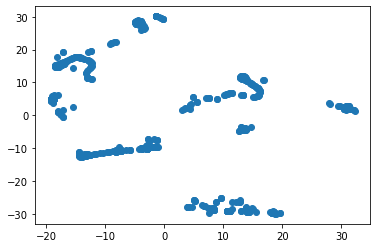

In [47]:
# Plot the results
plt.scatter(transformed_features[:,0], transformed_features[:,1])
plt.show()

Cluster Analysis with k-Means

C:\Users\Cecilia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


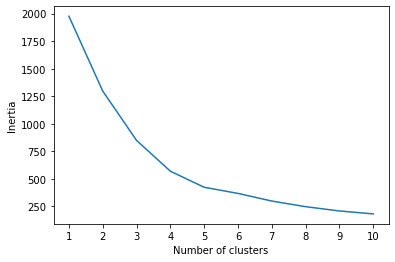

In [49]:
#Create an elbow plot to identify the best number of clusters.Use a for-loop to determine the inertia for each k between 1 through 10.
from sklearn.cluster import KMeans
inertia = []
k = [1,2,3,4,5,6,7,8,9,10]#Same as k = list(range(1, 11))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_feature_train)
    inertia.append(km.inertia_)

elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Recommendation

In [ ]:
# As we can see from the scatter plot, cryptocurrencies can be clustered together into 4 distinct major groups and 2 minor groups. 
# The elbow plot shows a slight curve, the number of clusters reduces while Inerita changes. 